<a href="https://colab.research.google.com/github/j0rge-20/Precip/blob/main/Precipitacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu
!pip install pandasql

#Links
#https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0

#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

#-----------------------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import pandasql as ps
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pandasql import sqldf


%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

#sql function def
pysqldf = lambda q: sqldf(q, globals())


     |████████████████████████████████| 320.4MB 54kB/s 
  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26818 sha256=6e3d0a83bd6150d26bc0e96886c9c197c8e817bd5bb32af562398335f746ebf1
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
#@title Loading dataset
path = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/DatasetFull.csv'
#path = 'https://raw.githubusercontent.com/j0rge-20/Precip/main/dataset_Original.csv'


df = pd.read_csv(path,
                 parse_dates=['Fecha'],
                 index_col="Fecha")

df.head()

,Anio,Mes,Estacion,Precipitacion,Temperatura,Humedad,BrilloSolar
Fecha,,,,,,,
1985-02-01,1985,2,2120629,39.5,11.10,86.00,124.00
1986-02-01,1986,2,2120629,68.1,11.40,79.86,120.40
1987-02-01,1987,2,2120629,24.0,12.22,79.86,136.16
1988-02-01,1988,2,2120629,111.7,12.22,79.86,136.16
1989-02-01,1989,2,2120629,145.0,12.22,79.86,136.16


In [ ]:
df.shape

# dataframe.size
size = df.size
# dataframe.shape
shape = df.shape
# dataframe.ndim
df_ndim = df.ndim
#print head dataframe
#print(df.head())

print('The DataFrame is :\n', df)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])
print('\nType of columns: ', df.dtypes)





The DataFrame is :
             Anio  Mes  Estacion  ...  Temperatura  Humedad  BrilloSolar
Fecha                            ...                                   
1985-02-01  1985    2   2120629  ...        11.10    86.00       124.00
1986-02-01  1986    2   2120629  ...        11.40    79.86       120.40
1987-02-01  1987    2   2120629  ...        12.22    79.86       136.16
1988-02-01  1988    2   2120629  ...        12.22    79.86       136.16
1989-02-01  1989    2   2120629  ...        12.22    79.86       136.16
...          ...  ...       ...  ...          ...      ...          ...
2015-06-01  2015    6   2401513  ...        14.50    72.00       164.30
2016-06-01  2016    6   2401513  ...        14.80    74.00       167.20
2017-06-01  2017    6   2401513  ...        13.90    81.00       161.30
2018-06-01  2018    6   2401513  ...        13.80    79.00       176.30
2019-06-01  2019    6   2401513  ...        14.90    59.79       138.60

[9348 rows x 7 columns]

Number of rows : 9

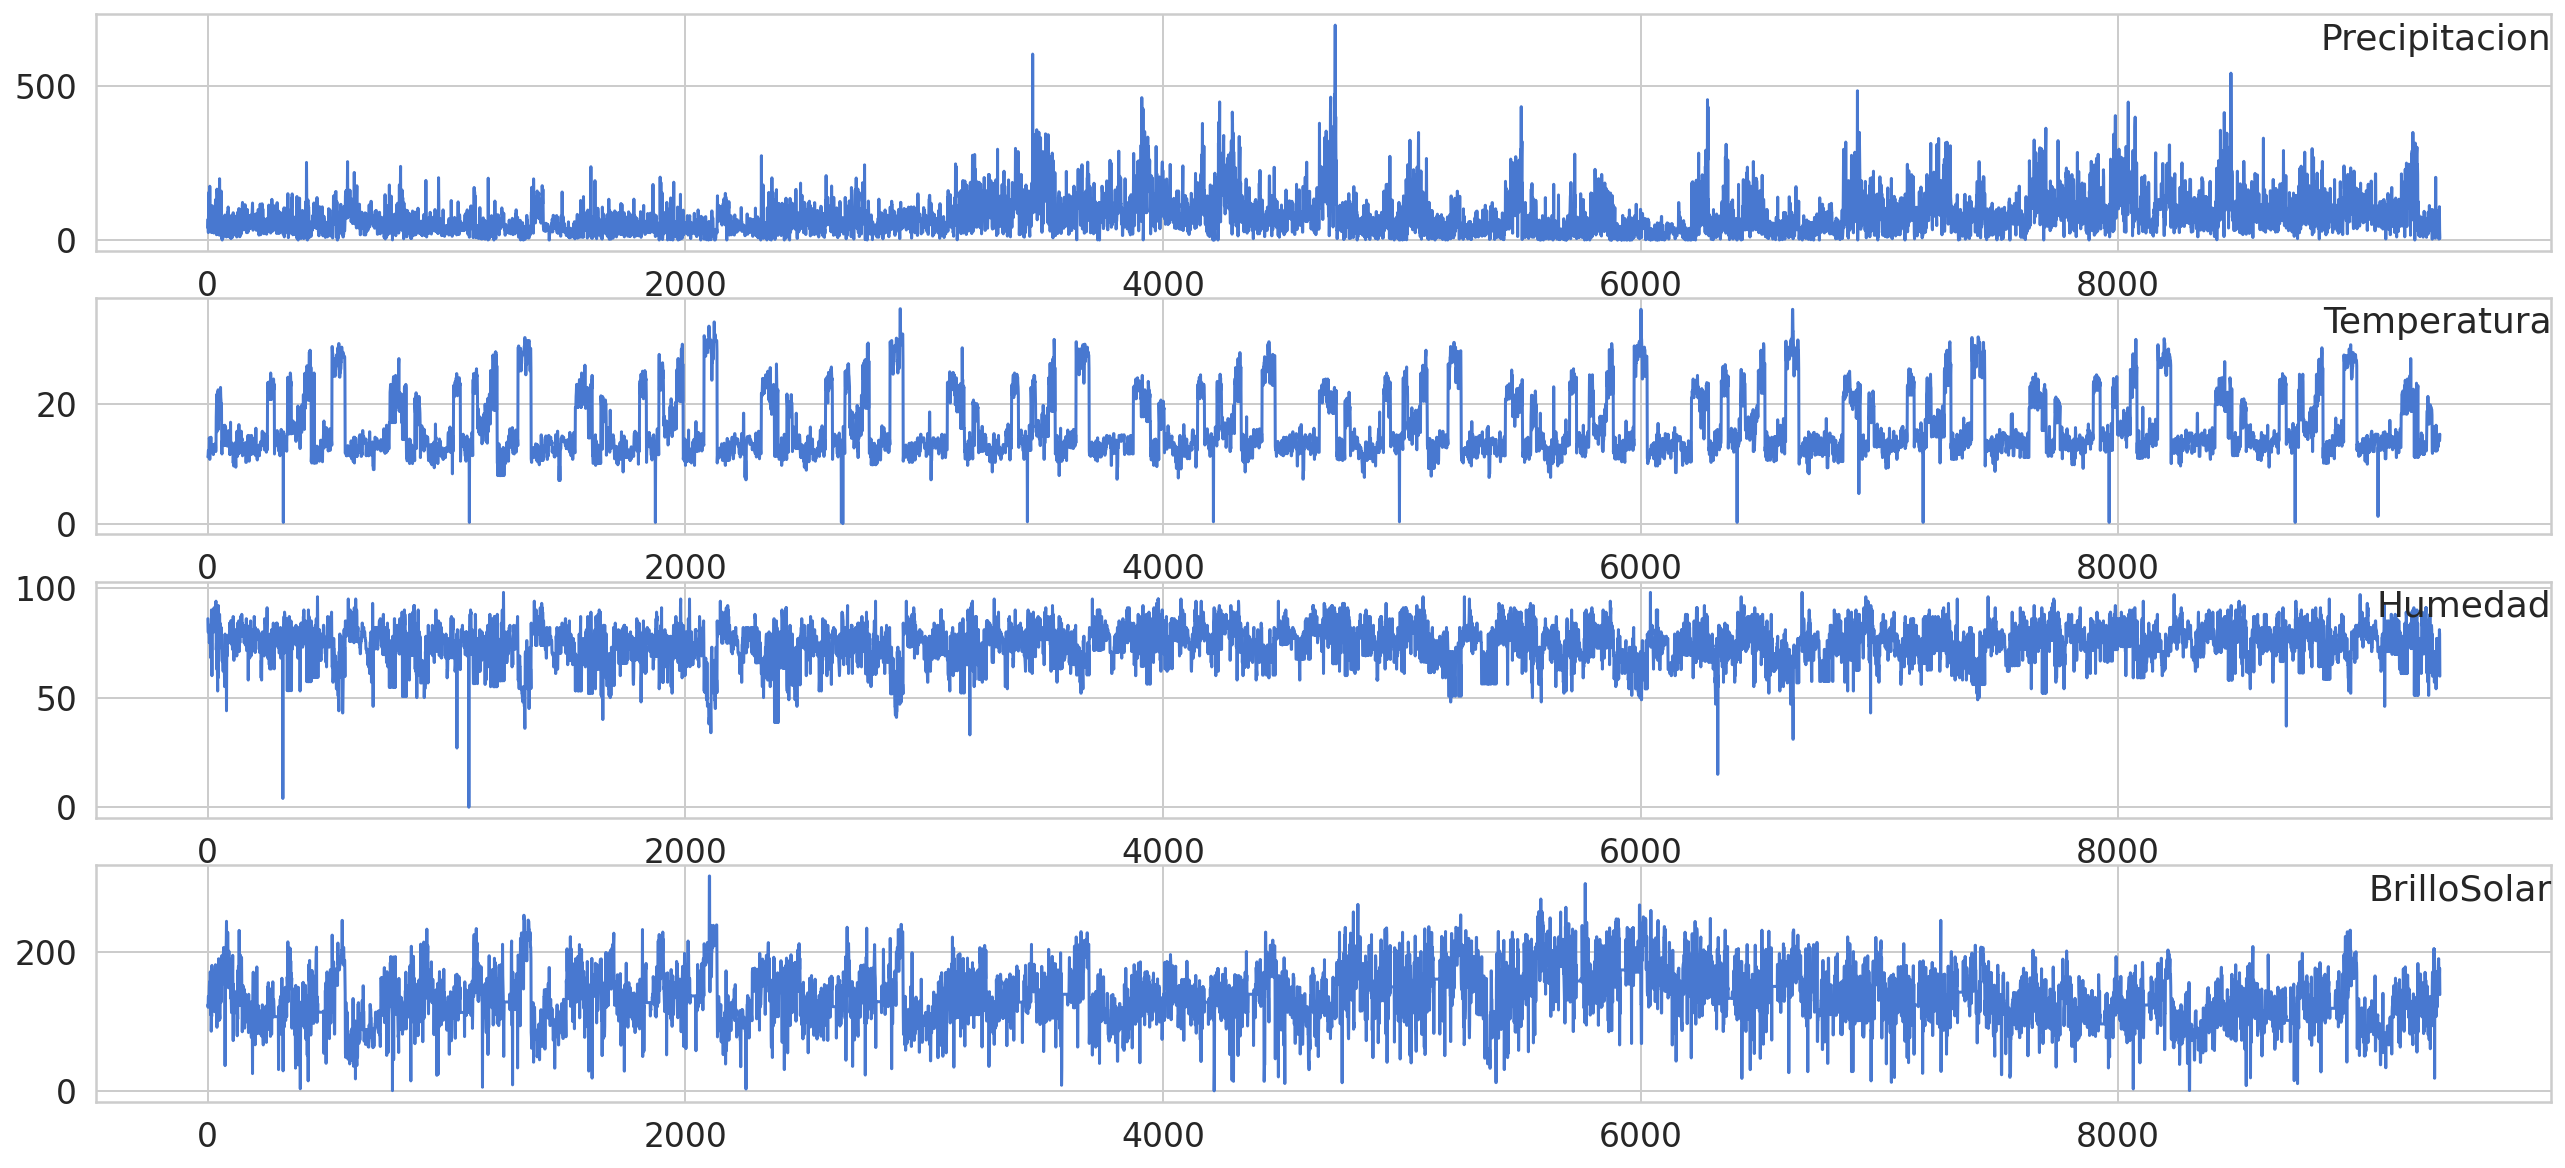

In [ ]:
#view series

# sns.lineplot(x=df2.index, y="Precipitacion", data=df2);
# sns.lineplot(x=df2.index, y="Temperatura", data=df2);

#df_graphic = df2.copy()

df_graphic = df.copy()

val = df_graphic.values
features = [3,4,5,6]

i =1
plt.figure()
for feature in features:
    plt.subplot(len(features),1,i)
    plt.plot(val[:,feature])
    plt.title(df_graphic.columns[feature], y= 0.8 , loc = 'right')
    i += 1



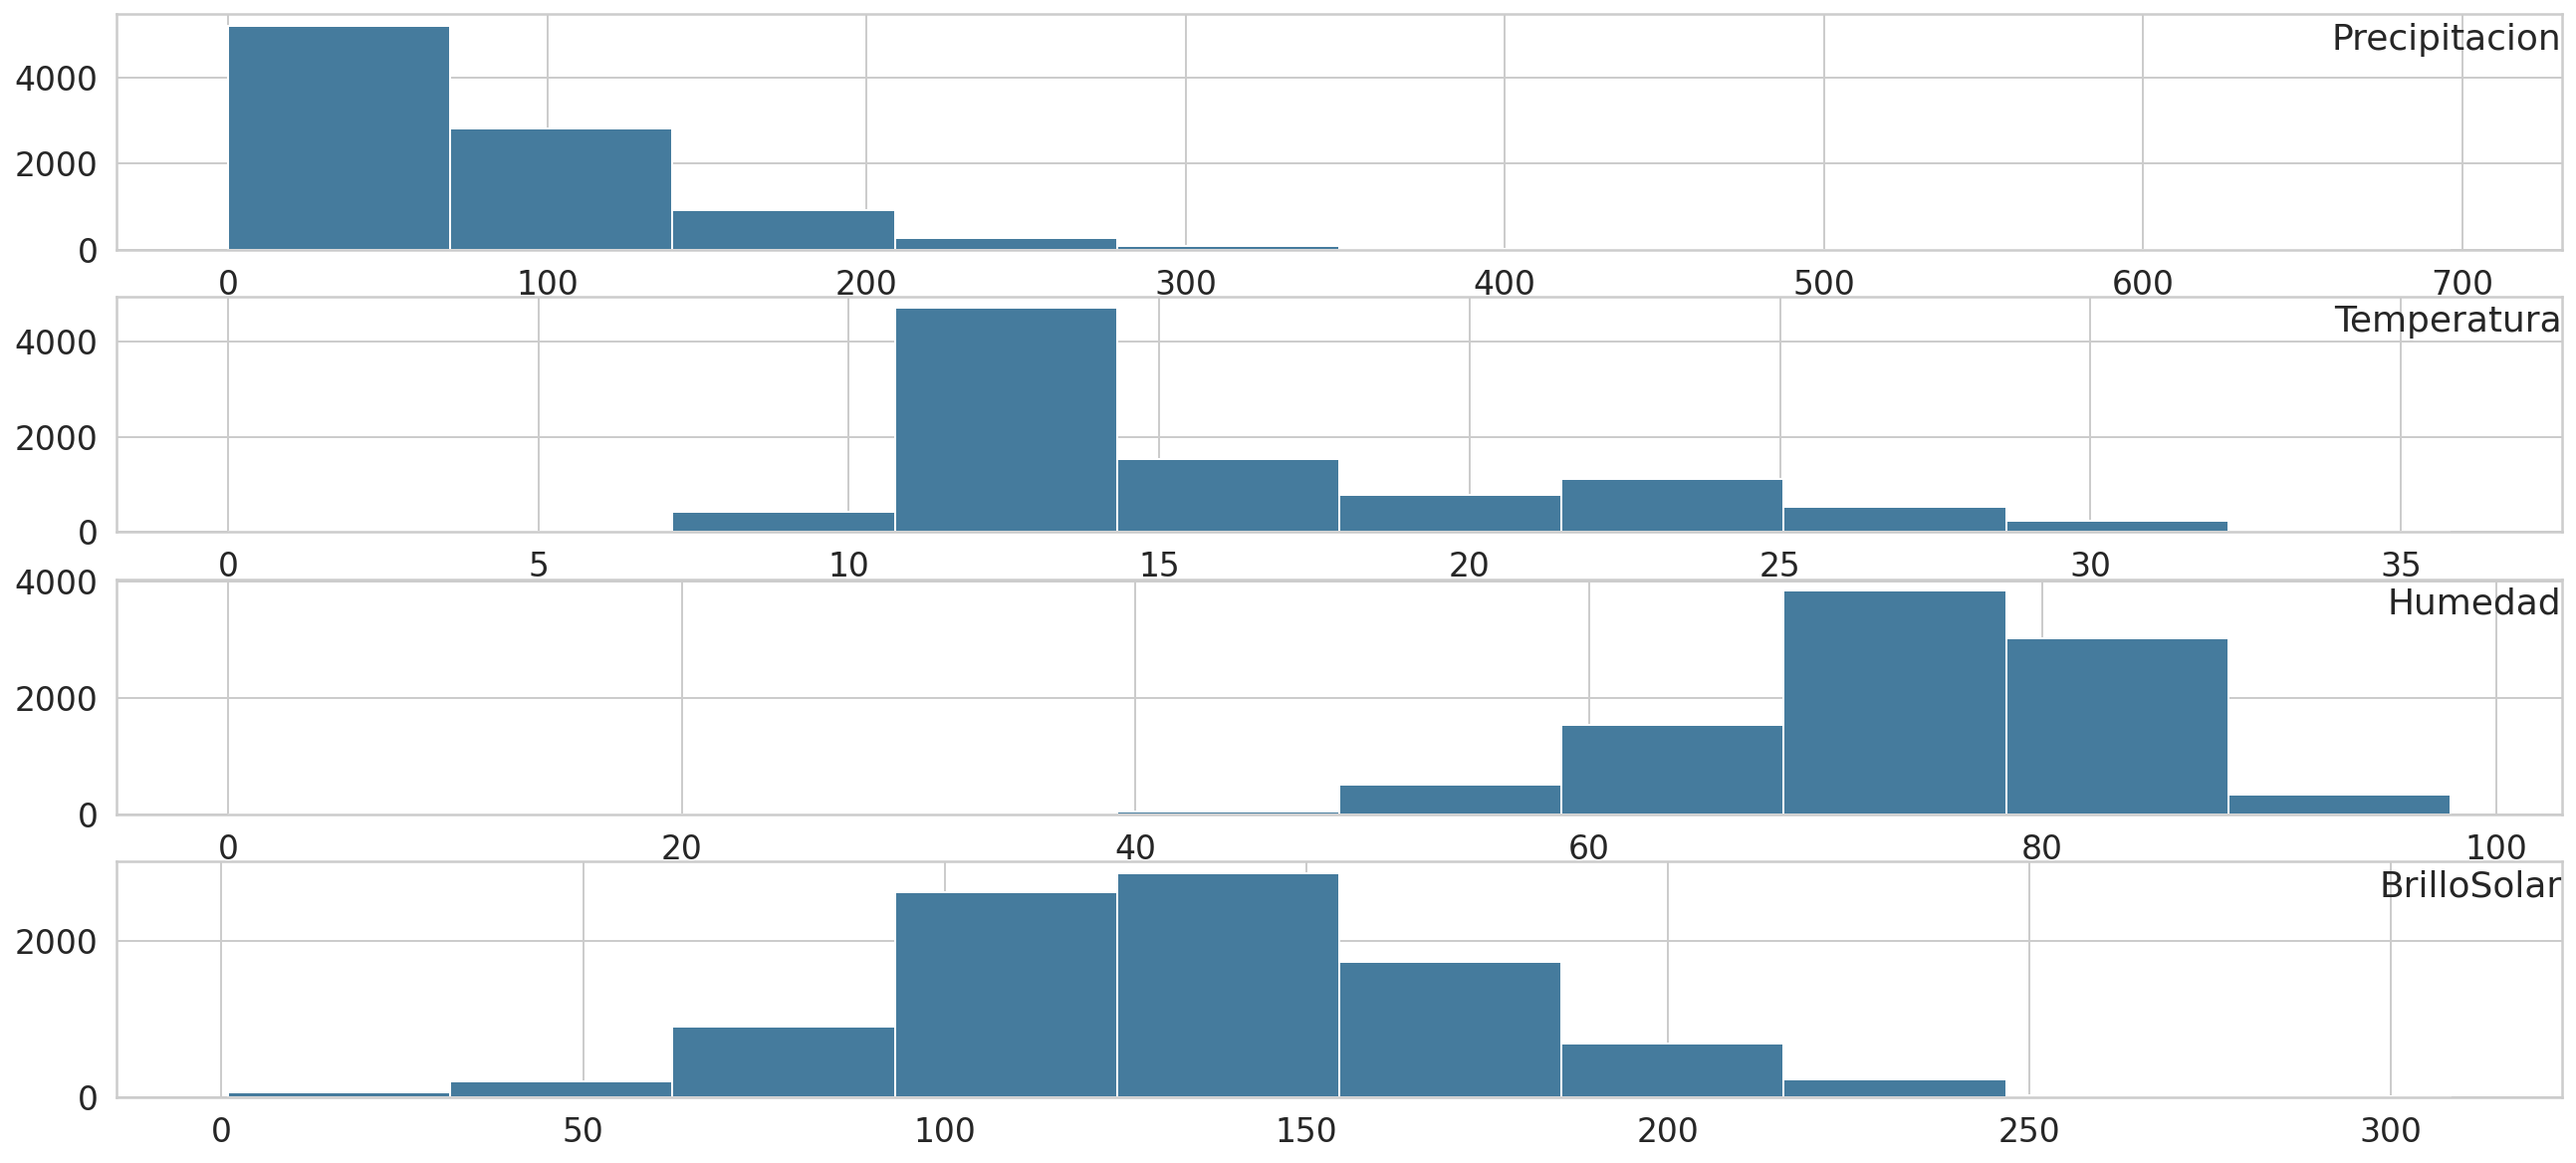

In [ ]:
#histogram
#pre = df_graphic['Precipitacion']

#plt.hist(pre)

i =1
plt.figure()
for feature in features:
    plt.subplot(len(features),1,i)
    plt.hist(val[:,feature],color='#457b9d')
    plt.title(df_graphic.columns[feature], y= 0.8 , loc = 'right')
    i += 1

In [ ]:
#df.head(10)


minvalues = df.min()
maxvalues = df.max()

nanvalues = df.isnull().sum(axis = 0)


print('****Valores Minimos****** \n',minvalues)
print('****Valores Maximos****** \n',maxvalues)
print('******Valores NAN***** \n',nanvalues)
# print('*****Promedio Precipitacion \n',df['Precipitacion'].mean())
# print('*****Promedio Temperatura \n',df['Temperatura'].mean())
# print('*****Promedio Humedad \n',df['Humedad'].mean())
# print('*****Promedio BrilloSolar \n',df['BrilloSolar'].mean())

def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

print('******%Valores Nulos******')
missing(df)

print('*******Estadisticos Dataset******** \n')
df.describe()




****Valores Minimos****** 
 Anio                1962.0
Mes                    1.0
Estacion         2119514.0
Precipitacion          0.0
Temperatura            0.0
Humedad                0.0
BrilloSolar            0.9
dtype: float64
****Valores Maximos****** 
 Anio                2019.0
Mes                   12.0
Estacion         2401519.0
Precipitacion        696.4
Temperatura           35.8
Humedad               98.0
BrilloSolar          308.3
dtype: float64
******Valores NAN***** 
 Anio             0
Mes              0
Estacion         0
Precipitacion    0
Temperatura      0
Humedad          0
BrilloSolar      0
dtype: int64
******%Valores Nulos******
BrilloSolar      0.0
Humedad          0.0
Temperatura      0.0
Precipitacion    0.0
Estacion         0.0
Mes              0.0
Anio             0.0
dtype: float64
*******Estadisticos Dataset******** 



,Anio,Mes,Estacion,Precipitacion,Temperatura,Humedad,BrilloSolar
count,9348.000000,9348.000000,9.348000e+03,9348.000000,9348.000000,9348.000000,9348.000000
mean,1997.173299,6.500000,2.173289e+06,78.027959,16.128712,74.447663,134.780830
std,14.486818,3.452237,9.987192e+04,62.821920,5.258016,9.169395,38.810763
min,1962.000000,1.000000,2.119514e+06,0.000000,0.000000,0.000000,0.900000
25%,1987.000000,3.750000,2.120559e+06,34.800000,12.490000,69.040000,109.692500
50%,1999.000000,6.500000,2.120629e+06,61.100000,14.000000,76.000000,132.700000
75%,2009.000000,9.250000,2.120647e+06,104.700000,19.500000,81.000000,159.300000
max,2019.000000,12.000000,2.401519e+06,696.400000,35.800000,98.000000,308.300000


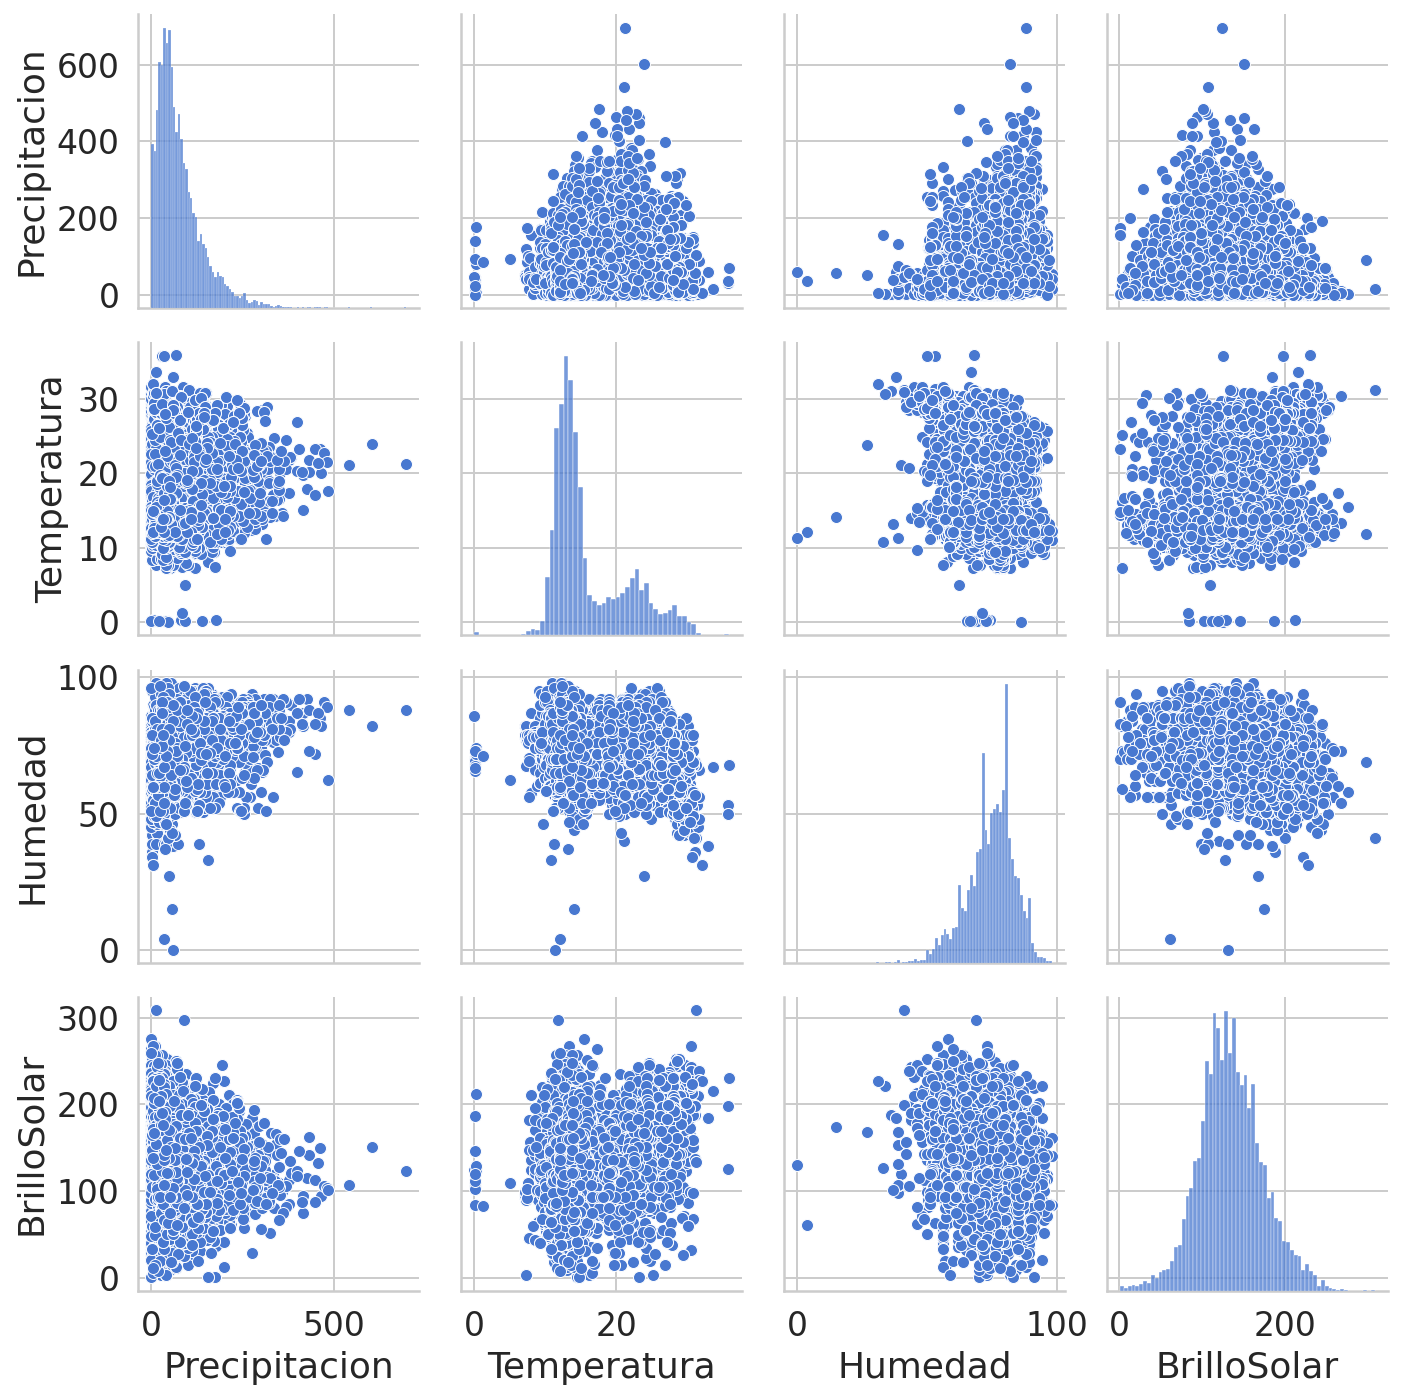

In [ ]:
#Simple Correlation
# plt.scatter(df2['Precipitacion'],df2['Temperatura'])
# plt.scatter(df2['Precipitacion'],df2['Humedad'])

#df3 = df_est.copy()
df3 = df.copy()

df3.drop(['Anio','Mes','Estacion'],axis = 1, inplace=True)

#df3.head(2)

sns.pairplot(df3)



In [ ]:
#correlation heatmap
corrMatrix = df3.corr()

print (corrMatrix)



               Precipitacion  Temperatura   Humedad  BrilloSolar
Precipitacion       1.000000     0.196147  0.289369    -0.204367
Temperatura         0.196147     1.000000 -0.181674     0.276747
Humedad             0.289369    -0.181674  1.000000    -0.250447
BrilloSolar        -0.204367     0.276747 -0.250447     1.000000


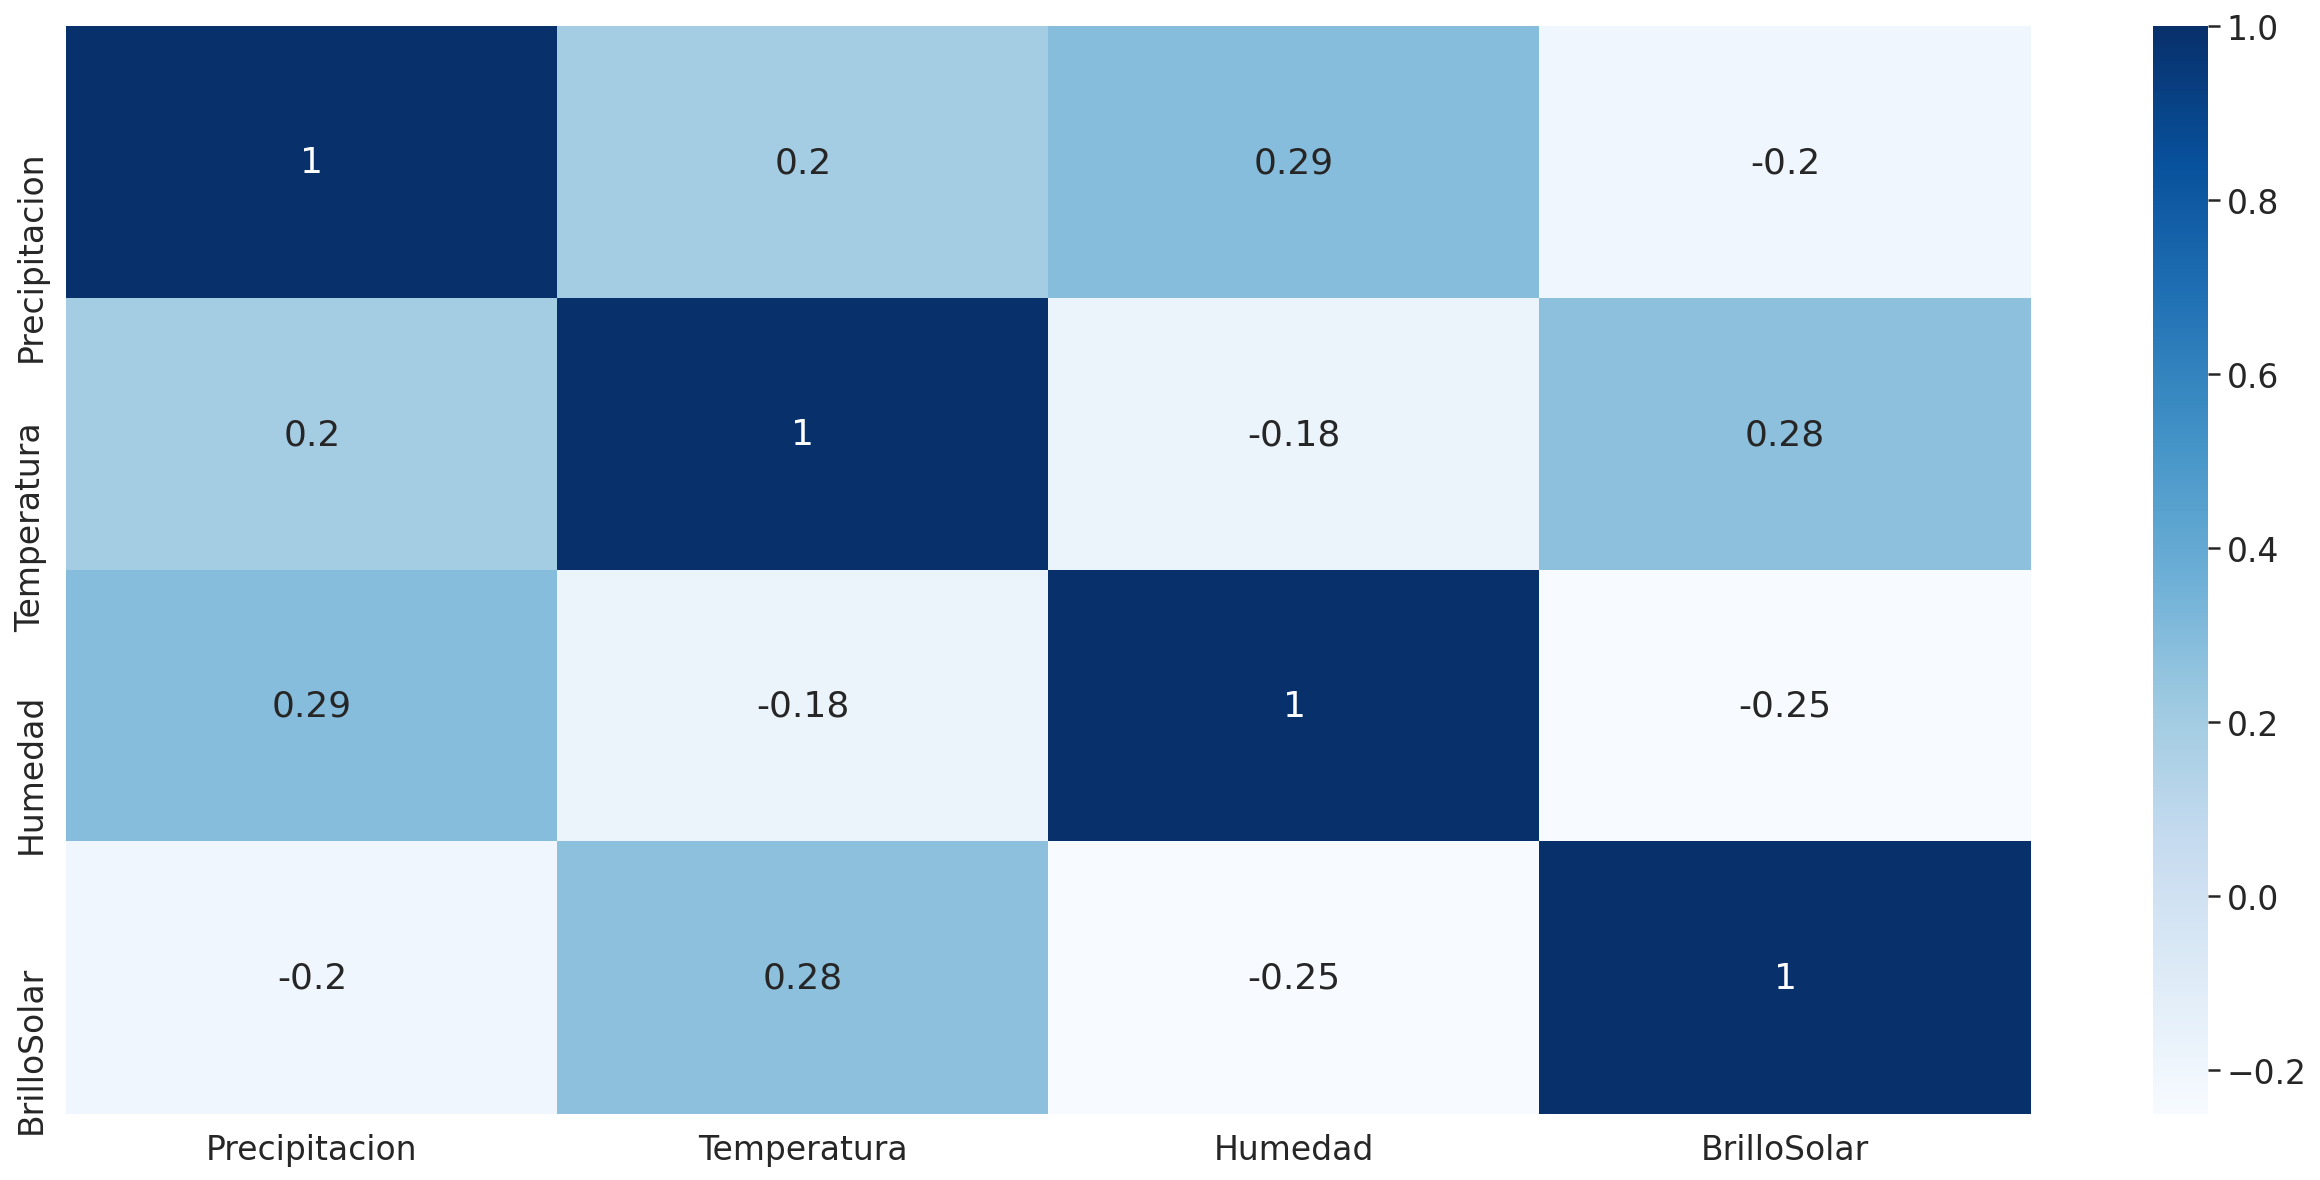

In [ ]:
sns.heatmap(corrMatrix,cmap="Blues",annot=True)

In [ ]:
#consultas sql
q1 = 'select estacion, count(1) as qty from df group by estacion order by qty desc'
q2 = 'select count(1) from df'
q3 = 'select fecha, estacion, precipitacion from df where precipitacion > 300 order by precipitacion desc'

print(pysqldf(q1))

# top 5 estaciones 2120559 - 2120540 - 2120644 - 2306507 - 2120557 - 2401519

    Estacion   qty
0    2120559  1152
1    2120540   696
2    2120644   660
3    2306507   648
4    2120557   636
5    2401519   636
6    2120562   624
7    2120548   612
8    2120561   456
9    2120629   420
10   2401513   396
11   2120639   360
12   2120630   348
13   2120646   348
14   2120641   336
15   2120647   300
16   2119514   276
17   2306517   240
18   2306516   204


In [ ]:
#función para crear dataframe por estaction
def sub_esta (df,cod):
    return df.query('Estacion in @cod')

#funcion para crear dataframe por mes

def sub_mes (df,m):
  return df.query('Mes in @m')


df_est = sub_esta (df,['2120559'])


df_ene = sub_mes(df_est,[1])
df_feb = sub_mes(df_est,[2])
df_mar = sub_mes(df_est,[3])
df_abr = sub_mes(df_est,[4])
df_may = sub_mes(df_est,[5])
df_jun = sub_mes(df_est,[6])
df_jul = sub_mes(df_est,[7])
df_ago = sub_mes(df_est,[8])
df_sep = sub_mes(df_est,[9])
df_oct = sub_mes(df_est,[10])
df_nov = sub_mes(df_est,[11])
df_dic = sub_mes(df_est,[12])



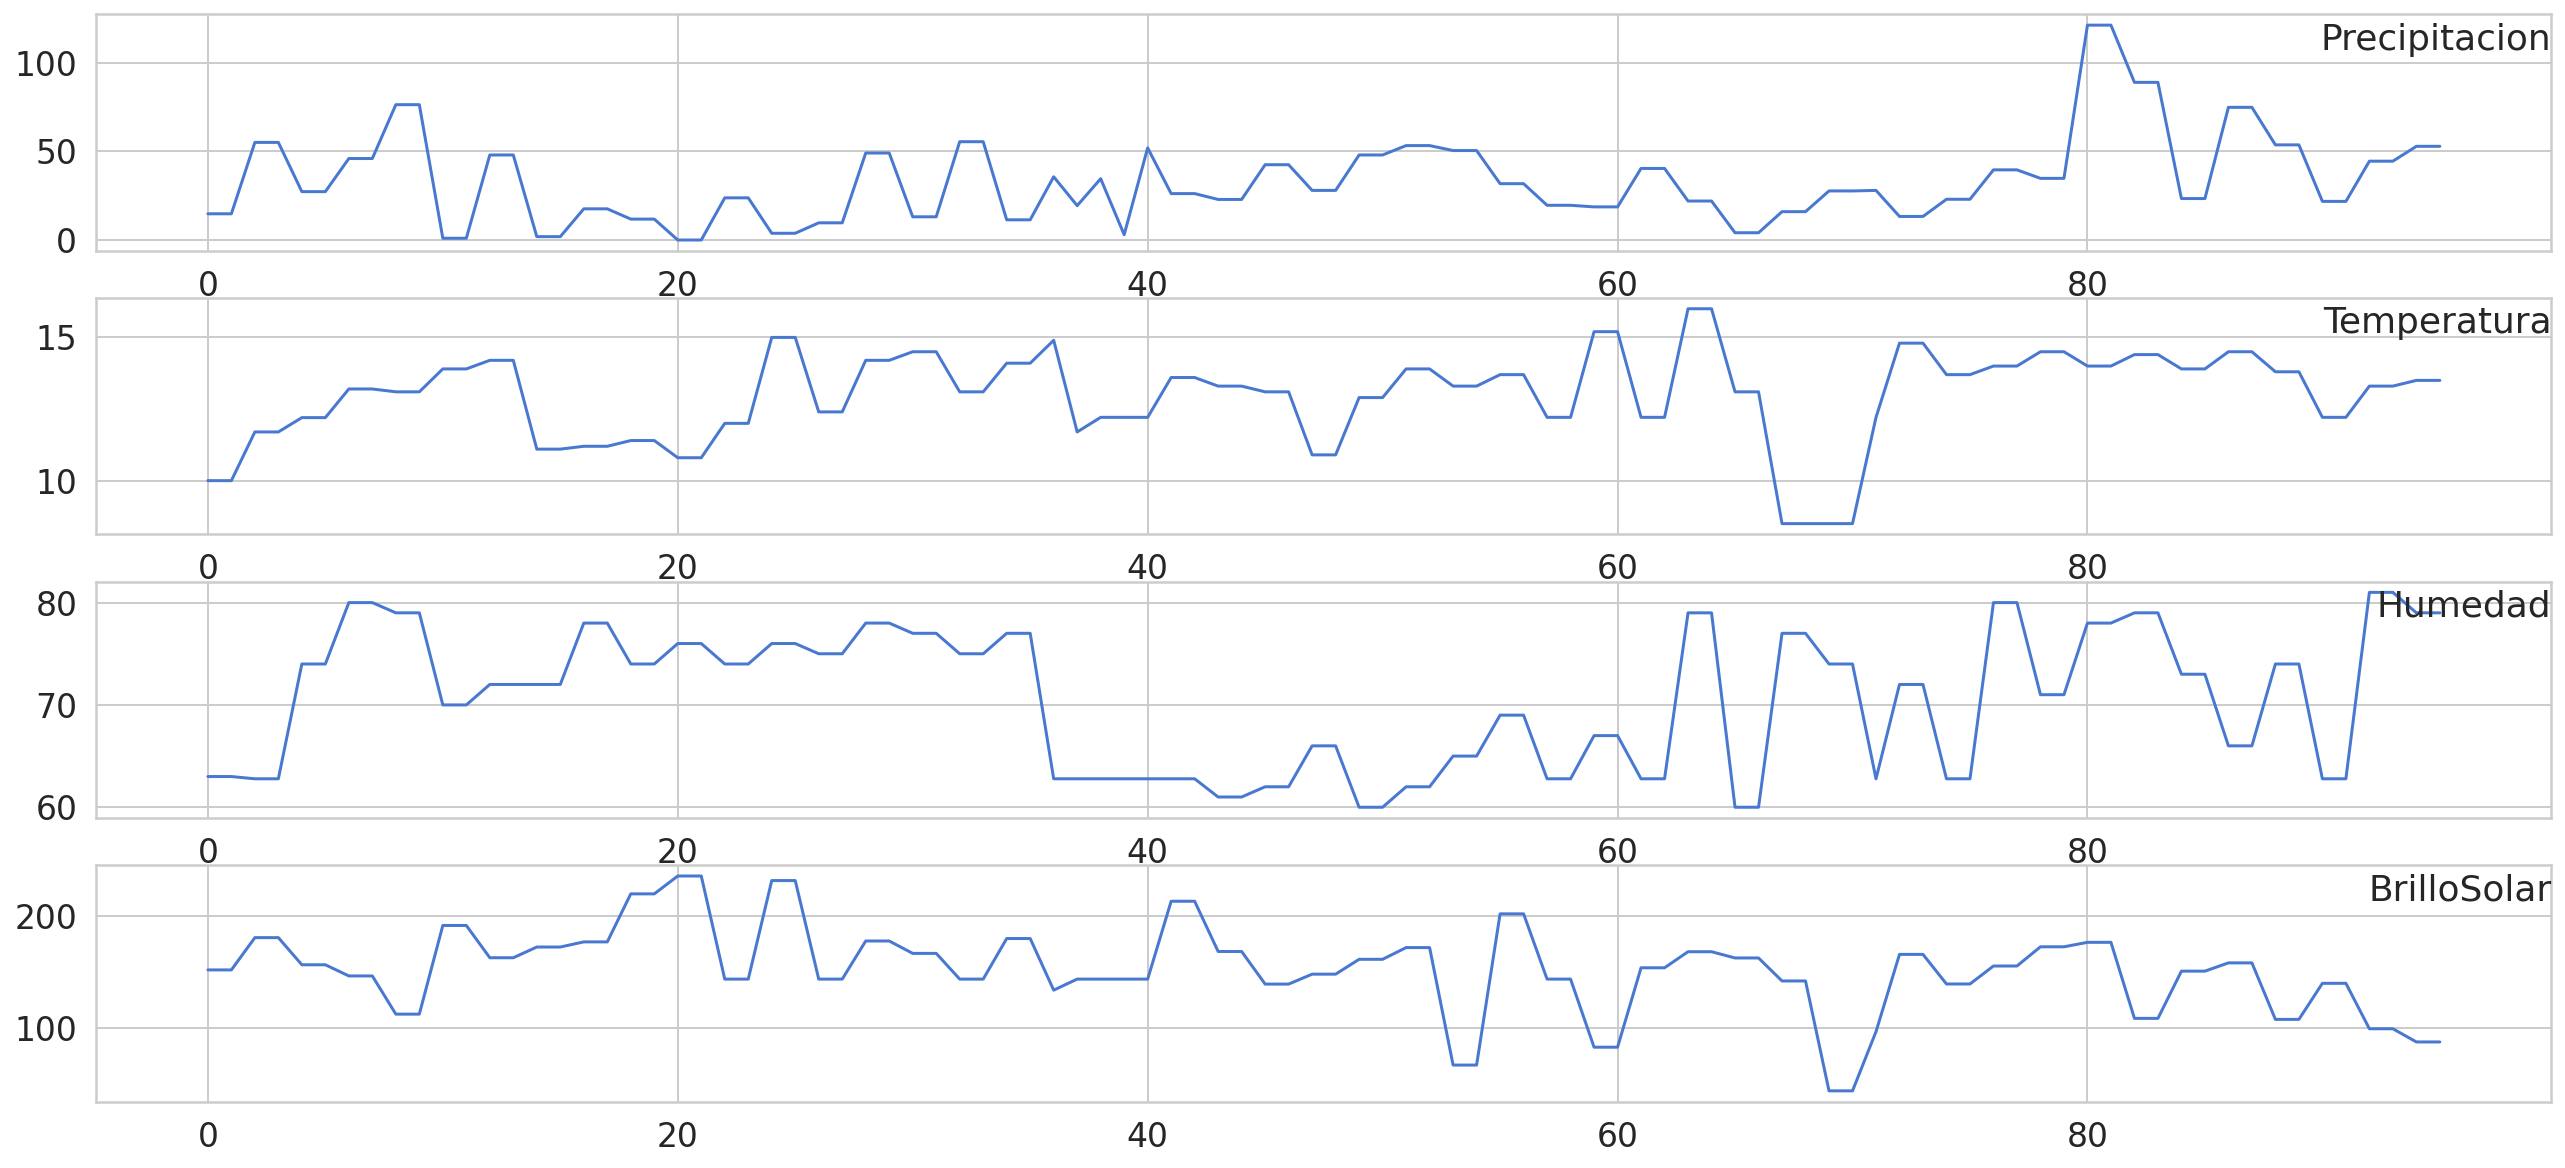

In [ ]:
#graphics station

df_graphic_station = df_ene
#df_graphic_station = df.copy()

val = df_graphic_station.values
features = [3,4,5,6]

i =1
plt.figure()
for feature in features:
    plt.subplot(len(features),1,i)
    plt.plot(val[:,feature])
    plt.title(df_graphic_station.columns[feature], y= 0.8 , loc = 'right')
    i += 1


In [ ]:
#Define train & test

df_an = df_ene.copy()

#tamanio entrenamiento 80%
tam_en = int(len(df_an)*0.80)
#tamanio pruebas 20%
tam_pru = len(df_an) - tam_en

#definir dataframes entrenamiento y pruebas

df_en,df_pru = df.



76 20 96
